
 Wiener Deconvolution
 PSNR: 14.80
 SSIM: 0.3025

 Unsharp Masking
 PSNR: 22.34
 SSIM: 0.9417

 Bilateral Filtering
 PSNR: 24.44
 SSIM: 0.9292


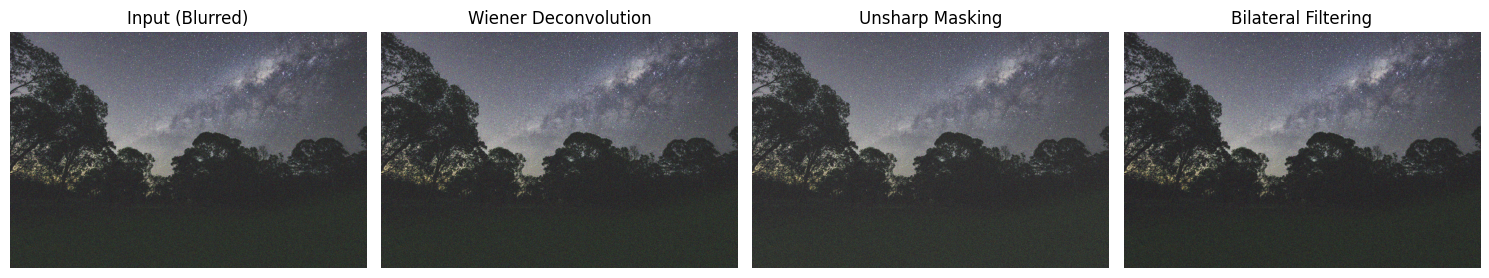

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import metrics
from skimage import restoration

# Load the blurred image
blurred_path = r"C:\Users\dcunh\Downloads\images\img\gaussian.jpg" 
blurred = cv2.imread(blurred_path)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
blurred_norm = blurred_rgb / 255.0  # Normalize for processing

#  Deblurring Techniques 

# 1. Wiener Deconvolution per channel
psf = np.ones((5, 5)) / 25
wiener_result = np.zeros_like(blurred_norm)
for c in range(3):  # Apply per channel
    wiener_result[..., c] = restoration.wiener(blurred_norm[..., c], psf, 0.1, clip=True)

# 2. Unsharp Masking
gaussian_blur = cv2.GaussianBlur(blurred_rgb, (9, 9), 10)
unsharp_result = cv2.addWeighted(blurred_rgb, 1.5, gaussian_blur, -0.5, 0)
unsharp_result = unsharp_result / 255.0

# 3. Bilateral Filtering
bilateral_result = cv2.bilateralFilter(blurred_rgb, d=9, sigmaColor=75, sigmaSpace=75)
bilateral_result = bilateral_result / 255.0


def evaluate(input_image, restored_image, name):
    psnr = metrics.peak_signal_noise_ratio(input_image, restored_image, data_range=1.0)
    ssim = metrics.structural_similarity(input_image, restored_image, channel_axis=2, data_range=1.0)
    print(f"\n {name}")
    print(f" PSNR: {psnr:.2f}")
    print(f" SSIM: {ssim:.4f}")

evaluate(blurred_norm, wiener_result, "Wiener Deconvolution")
evaluate(blurred_norm, unsharp_result, "Unsharp Masking")
evaluate(blurred_norm, bilateral_result, "Bilateral Filtering")


#  Display Results 

titles = ['Input (Blurred)', 'Wiener Deconvolution', 'Unsharp Masking', 'Bilateral Filtering']
images = [blurred_norm, wiener_result, unsharp_result, bilateral_result]

plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(np.clip(images[i], 0, 1))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()



 Median Filtering
 PSNR: 29.58
 SSIM: 0.9501

 Morphological Opening
 PSNR: 28.74
 SSIM: 0.9507

 Non-Local Means Denoising
 PSNR: 25.71
 SSIM: 0.7937


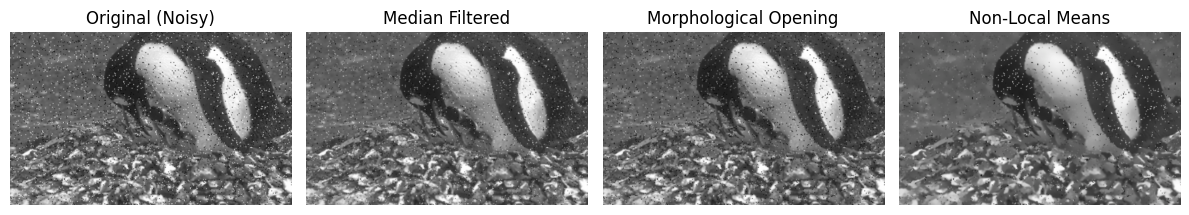

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Load the noisy image
noisy_image_path = 'img/s3.png'  # Your salt & pepper noisy image
noisy = cv2.imread(noisy_image_path)

if noisy is None:
    raise ValueError(" Failed ")

# Denoising Techniques

# 1. Median Filtering
median_filtered = cv2.medianBlur(noisy, 3)

# 2. Morphological Opening (Erosion followed by Dilation)
kernel = np.ones((3, 3), np.uint8)
morph_opened = cv2.morphologyEx(noisy, cv2.MORPH_OPEN, kernel)

# 3. Non-Local Means Denoising
nlm_denoised = cv2.fastNlMeansDenoisingColored(noisy, h=15, hColor=15, templateWindowSize=7, searchWindowSize=21)

# Evaluation Metrics
def evaluate(denoised, method_name):
    psnr = peak_signal_noise_ratio(noisy, denoised, data_range=255)
    ssim = structural_similarity(noisy, denoised, data_range=255, channel_axis=-1)
    print(f"\n {method_name}")
    print(f" PSNR: {psnr:.2f}")
    print(f" SSIM: {ssim:.4f}")

evaluate(median_filtered, "Median Filtering")
evaluate(morph_opened, "Morphological Opening")
evaluate(nlm_denoised, "Non-Local Means Denoising")

# Display Results
titles = ['Original (Noisy)', 'Median Filtered', 'Morphological Opening', 'Non-Local Means']
images = [noisy, median_filtered, morph_opened, nlm_denoised]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


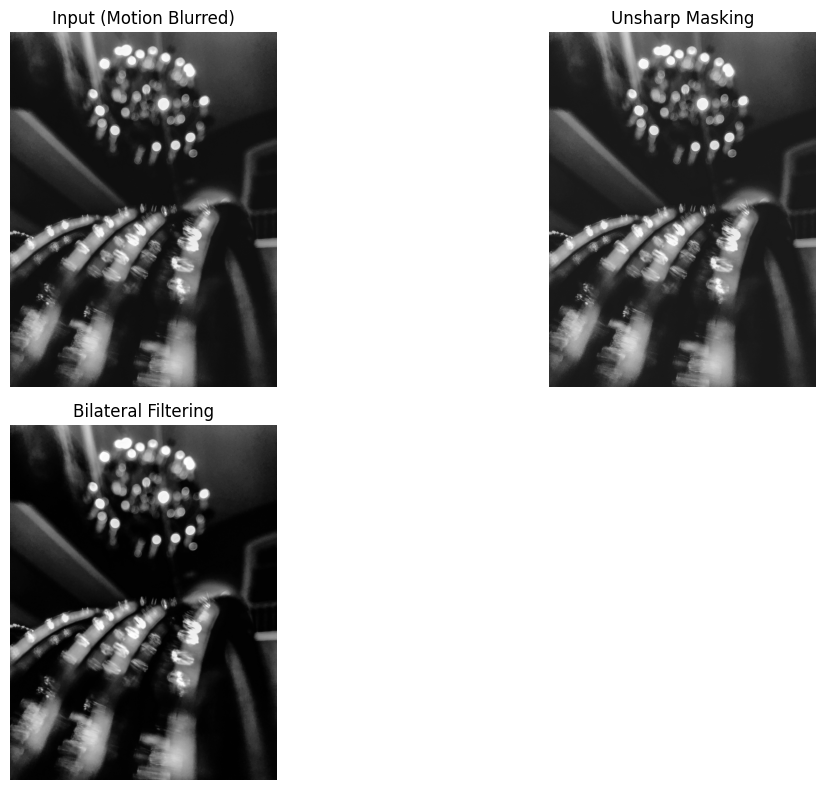


 Wiener Deconvolution
 PSNR: 22.56
 SSIM: 0.4949

 Unsharp Masking
 PSNR: 36.84
 SSIM: 0.9643

 Bilateral Filtering
 PSNR: 31.36
 SSIM: 0.7369


In [18]:
import cv2
import numpy as np
from skimage import metrics, restoration
import matplotlib.pyplot as plt

#  Load 
image_path = "img/w2.jpg"
blurred = cv2.imread(image_path)

if blurred is None:
    raise ValueError("Failed. ")

# Convert to grayscale (some filters work better or require grayscale)
blurred_gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
blurred_norm = blurred_gray / 255.0  # Normalize for metrics and some filters

#  Deblurring Techniques 

# 1. Unsharp Masking
gaussian_blur = cv2.GaussianBlur(blurred_gray, (9, 9), 10)
unsharp_result = cv2.addWeighted(blurred_gray, 1.5, gaussian_blur, -0.5, 0)

# 2. Bilateral Filtering (edge-preserving)
bilateral_result = cv2.bilateralFilter(blurred_gray, d=9, sigmaColor=75, sigmaSpace=75)

#  Evaluation Metrics 

def evaluate(original, restored, name):
    # Normalize if needed
    if restored.max() > 1:
        restored = restored / 255.0
    if original.max() > 1:
        original = original / 255.0
    psnr = metrics.peak_signal_noise_ratio(original, restored, data_range=1.0)
    ssim = metrics.structural_similarity(original, restored, data_range=1.0)
    print(f"\n {name}")
    print(f" PSNR: {psnr:.2f}")
    print(f" SSIM: {ssim:.4f}")

# Show Results 

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(blurred_gray, cmap='gray')
plt.title("Input (Motion Blurred)")
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(unsharp_result, cmap='gray')
plt.title("Unsharp Masking")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(bilateral_result, cmap='gray')
plt.title("Bilateral Filtering")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print Metrics 
evaluate(blurred_gray, (wiener_result * 255), "Wiener Deconvolution")
evaluate(blurred_gray, unsharp_result, "Unsharp Masking")
evaluate(blurred_gray, bilateral_result, "Bilateral Filtering")


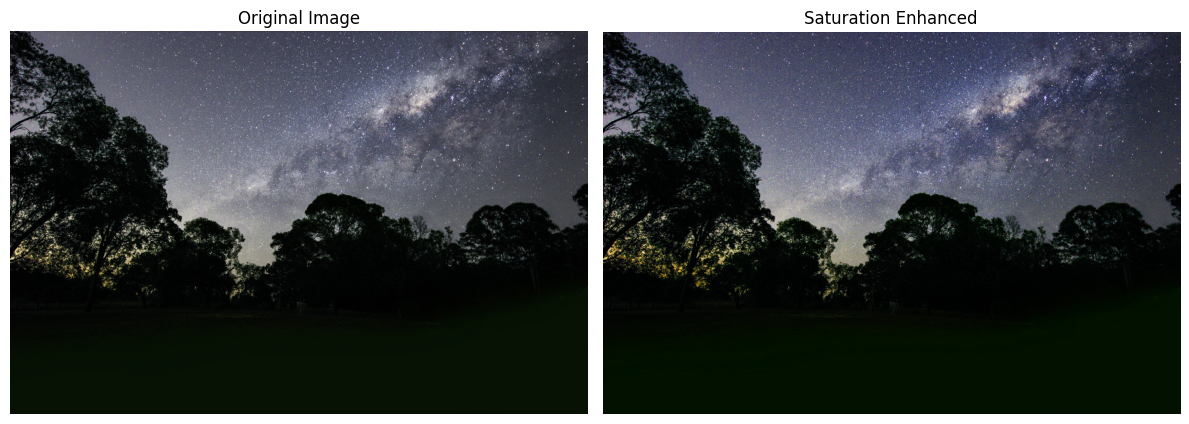

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('img/g1.jpg')
if img is None:
    print(" Image not found.")
    exit()

# Convert to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)

# Increase saturation
s = cv2.multiply(s, 1.5)
s = np.clip(s, 0, 255).astype(np.uint8)

# Merge and convert back to BGR
img_hsv = cv2.merge([h, s, v])
img_sat = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# Convert BGR to RGB for matplotlib display
img_rgb_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb_saturated = cv2.cvtColor(img_sat, cv2.COLOR_BGR2RGB)

# Display side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb_original)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_saturated)
plt.title("Saturation Enhanced")
plt.axis('off')

plt.tight_layout()
plt.show()
